# ECOM90025 ADA: Tutorial 9 in Week 10

- Covering materials from week 9 lecture: clusters.

# My contact:
- Name: Zheng Fan
- Email: fan.z@unimelb.edu.au
- Send me an email if you have any general or conceptual questions
- I'm also happy to stay for a while after the tutorial.
- Consultataion: meet Dr Yong Song every Tuesday 1-2pm at FBE level-3 360.
- Special consideration: visit Stop 1.

# Tutorial participation 
- You need to actively participate instead of just showing up. 
- Attendance does not guarantee marks. 
- You may get a maximum of 10 points out of 11 tutorials.
- If you unable to come to school, seek help from Stop 1.

# Software:
- Google Colab is a free online platform where you can execute your code (especially for Python) and write text (LaTeX and Html) without any software installed.
- Local Jupyter Lab, which has been demonstrated during the lecture.
- Local Jupyter Notebook from Anaconda (My personal preference). Just download Anaconda, and then open Jupyter Notebook.
- Other IDE such as PyCharm, but I'm not very comfortable with using PyCharm. From what I know, the code saved in PyCharm is .py but not .ipynb, which may requires some conversion.

Although you can always use Colab, It is recommended to have a local machine installed.

#### You may access my tutorial code via: https://github.com/zhengf1/2023-S2-ADA or Canvas after Wednesday afternoon.
- <font color="red">
If you are using Google Colab, you can simply copy paste the code; or you can upload this ".ipynb" notebook file to Google Colab, which would look exactly the same as local Jupyter machine.
    </font>

# Housekeeping code to start with

In [1]:
import pandas as pd
import numpy as np
from scipy.stats import dirichlet, gamma, uniform, norm
import plotly.express as px
import plotly.graph_objects as go
import statsmodels.formula.api as smf
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
import patsy
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import mean_squared_error
from sklearn import datasets
from sklearn.linear_model import LogisticRegression

# [Iris flower data set](https://en.wikipedia.org/wiki/Iris_flower_data_set)

1. Construct a data frame with 4 features and target (the true names of the iris flowers).
2. Fit the data to the K-mean method by setting $K=3$.
3. Visualise the clusters via covariates: sepal length, sepal width,	petal length and petal width.
4. Cross-tabulate the prediction of clusters and the true values of the target. Intuitively, you should be able to identify these labels.
5. Apply a Logistic regression on the targets,
predict and check the cross-tabulation. Does it work better than the K-mean method? Why?
6. Extract the principle components and use them as the `X` variable to repeat the above K-mean method.

## 1. Construct a data frame with 4 features and target (the true names of the iris flowers).

In [2]:
iris = datasets.load_iris()
type(iris)
dir(iris)

['DESCR',
 'data',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [3]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [4]:
df_iris = pd.DataFrame(iris.data, columns=iris.feature_names)
df_iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [5]:
iris['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

Three types of flowers in total. Target = 0 -> "setosa' and so on. For easy reference, we call them type1, type2 and type3.

In [6]:
df_iris['target'] = iris.target
df_iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [7]:
df_iris['target'] = df_iris['target'].replace({0:"type1", 1:"type2", 2:"type3"})
df_iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,type1
1,4.9,3.0,1.4,0.2,type1
2,4.7,3.2,1.3,0.2,type1
3,4.6,3.1,1.5,0.2,type1
4,5.0,3.6,1.4,0.2,type1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,type3
146,6.3,2.5,5.0,1.9,type3
147,6.5,3.0,5.2,2.0,type3
148,6.2,3.4,5.4,2.3,type3


In [8]:
df_iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


## 2. Fit the data to the K-mean method by setting $K=3$.

In [9]:
# KMeans clustering
data = df_iris.iloc[:, 0:4] # use only the 4 features.
data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [10]:
kmeans = KMeans(n_clusters=3) # We know there are 3 types of iris species
kmeans.fit(data)
y_kmeans = kmeans.predict(data)
print(y_kmeans)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


## 3. Visualise the clusters via covariates: sepal length, sepal width,	petal length and petal width.

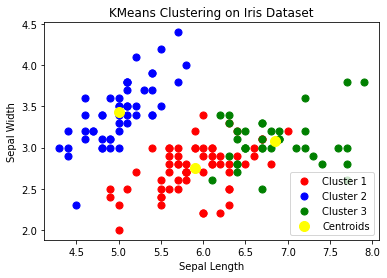

In [11]:
# Plotting the clusters using the first two features (sepal length and sepal width)
# You should be able to produce plots at other dimensions. Try it yourself!!!
plt.scatter(data.iloc[y_kmeans == 0, 0], data.iloc[y_kmeans == 0, 1], s=50, c='red', label='Cluster 1')
plt.scatter(data.iloc[y_kmeans == 1, 0], data.iloc[y_kmeans == 1, 1], s=50, c='blue', label='Cluster 2')
plt.scatter(data.iloc[y_kmeans == 2, 0], data.iloc[y_kmeans == 2, 1], s=50, c='green', label='Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='yellow', label='Centroids')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.legend()
plt.title('KMeans Clustering on Iris Dataset')
plt.show()

However, we usually do not know the number of real clusters. Let's see what would happen if we assume there are 4 types.

In [12]:
kmeans2 = KMeans(n_clusters=4) # We know there are 3 types of iris species
kmeans2.fit(data)
y_kmeans2 = kmeans2.predict(data)
print(y_kmeans2)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 3 3 3 2 3 2 3 2 3 2 2 2 2 3 2 3 2 2 3 2 3 2 3 3
 3 3 3 3 3 2 2 2 2 3 2 3 3 3 2 2 2 3 2 2 2 2 2 3 2 2 1 3 1 1 1 1 2 1 1 1 3
 3 1 3 3 1 1 1 1 3 1 3 1 3 1 1 3 3 1 1 1 1 1 3 3 1 1 1 3 1 1 1 3 1 1 1 3 3
 1 3]


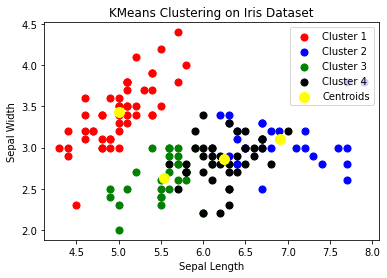

In [13]:
# Plotting the clusters using the first two features (sepal length and sepal width)
# You should be able to produce plots at other dimensions. Try it yourself!!!
plt.scatter(data.iloc[y_kmeans2 == 0, 0], data.iloc[y_kmeans2 == 0, 1], s=50, c='red', label='Cluster 1')
plt.scatter(data.iloc[y_kmeans2 == 1, 0], data.iloc[y_kmeans2 == 1, 1], s=50, c='blue', label='Cluster 2')
plt.scatter(data.iloc[y_kmeans2 == 2, 0], data.iloc[y_kmeans2 == 2, 1], s=50, c='green', label='Cluster 3')
plt.scatter(data.iloc[y_kmeans2 == 3, 0], data.iloc[y_kmeans2 == 3, 1], s=50, c='black', label='Cluster 4')
# plt.scatter(data.iloc[y_kmeans2 == 4, 0], data.iloc[y_kmeans2 == 4, 1], s=50, c='purple', label='Cluster 5')
plt.scatter(kmeans2.cluster_centers_[:, 0], kmeans2.cluster_centers_[:, 1], s=100, c='yellow', label='Centroids')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.legend()
plt.title('KMeans Clustering on Iris Dataset')
plt.show()

## 4. Cross-tabulate the prediction of clusters and the true values of the target. Intuitively, you should be able to identify these labels.

In [14]:
df_iris['prediction'] = y_kmeans
df_iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,prediction
0,5.1,3.5,1.4,0.2,type1,1
1,4.9,3.0,1.4,0.2,type1,1
2,4.7,3.2,1.3,0.2,type1,1
3,4.6,3.1,1.5,0.2,type1,1
4,5.0,3.6,1.4,0.2,type1,1
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,type3,2
146,6.3,2.5,5.0,1.9,type3,0
147,6.5,3.0,5.2,2.0,type3,2
148,6.2,3.4,5.4,2.3,type3,2


In [15]:
print(pd.crosstab(df_iris['prediction'], df_iris['target']))

target      type1  type2  type3
prediction                     
0               0     48     14
1              50      0      0
2               0      2     36


## 5. Apply a Logistic regression on the targets,
predict and check the cross-tabulation. Does it work better than the K-mean method? Why?

In [16]:
logit_model = LogisticRegression(solver='saga', multi_class='multinomial', max_iter=10000)
X = df_iris.iloc[:, 0:4]
y = df_iris['target']
logit_model.fit(X, y)

LogisticRegression(max_iter=10000, multi_class='multinomial', solver='saga')

In [17]:
y_hat = logit_model.predict(X)
y_hat

array(['type1', 'type1', 'type1', 'type1', 'type1', 'type1', 'type1',
       'type1', 'type1', 'type1', 'type1', 'type1', 'type1', 'type1',
       'type1', 'type1', 'type1', 'type1', 'type1', 'type1', 'type1',
       'type1', 'type1', 'type1', 'type1', 'type1', 'type1', 'type1',
       'type1', 'type1', 'type1', 'type1', 'type1', 'type1', 'type1',
       'type1', 'type1', 'type1', 'type1', 'type1', 'type1', 'type1',
       'type1', 'type1', 'type1', 'type1', 'type1', 'type1', 'type1',
       'type1', 'type2', 'type2', 'type2', 'type2', 'type2', 'type2',
       'type2', 'type2', 'type2', 'type2', 'type2', 'type2', 'type2',
       'type2', 'type2', 'type2', 'type2', 'type2', 'type2', 'type2',
       'type3', 'type2', 'type2', 'type2', 'type2', 'type2', 'type2',
       'type3', 'type2', 'type2', 'type2', 'type2', 'type2', 'type3',
       'type2', 'type2', 'type2', 'type2', 'type2', 'type2', 'type2',
       'type2', 'type2', 'type2', 'type2', 'type2', 'type2', 'type2',
       'type2', 'typ

In [18]:
print(pd.crosstab(y_hat, df_iris['target']))

target  type1  type2  type3
row_0                      
type1      50      0      0
type2       0     47      0
type3       0      3     50


Note that, this is just a in-sample fit where we assume we already know the true type, but in practise, we do not know.

## Principle components analysis (PCA)

- In principal component analysis (PCA), we reduce dimension by projecting the data onto lines.
- “Lose as little information as possible” is defined as “keep as much of the variability of the original data as possible”.

More generally, in PCA, when reducing the $p$-variate $X_i$ 's to univariate $Y_{i 1}$ 's, for $i=1, \ldots, n$, where the $X_i$ 's are i.i.d. $\sim(0, \Sigma)$, the goal is to find the linear projection
$$
Y_{i 1}=a_1 X_{i 1}+\ldots+a_p X_{i p}
$$
such that
$$
\sum_{j=1}^p a_j^2=1
$$
and
$$
\operatorname{var}\left(Y_{i 1}\right)
$$
is as large as possible.

- The constraint on a is a scaling factor that makes things easier.

## 6. Extract the principle components and use them as the `X` variable to repeat the above K-mean method.

In [19]:
scalar = StandardScaler()
X_scaled = scalar.fit_transform(X)

In [20]:
pca = PCA(n_components=4)
X_pca = pca.fit_transform(X_scaled)

In [21]:
explained_variance_ratio = pca.explained_variance_ratio_
explained_variance_ratio

array([0.72962445, 0.22850762, 0.03668922, 0.00517871])

In [22]:
list(df_iris.columns[0:4])
df_iris.columns[0:4]

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')

In [23]:
# Rotation matrix (loadings)
vec = pca.components_.T
Loadings = pd.DataFrame(vec, index=df_iris.columns[0:4], columns = ['PC1', 'PC2', 'PC3', 'PC4'])
Loadings

,PC1,PC2,PC3,PC4
sepal length (cm),0.521066,0.377418,-0.719566,-0.261286
sepal width (cm),-0.269347,0.923296,0.244382,0.123510
petal length (cm),0.580413,0.024492,0.142126,0.801449
petal width (cm),0.564857,0.066942,0.634273,-0.523597


PC1 puts weight 0.52106591, -0.26934744, 0.5804131, 0.56485654 on, respectively, the sepal
length, the sepal width, the petal length and the petal width.

In [24]:
np.sum(np.square(vec[:,0]))

0.9999999999999993

Put the Principle components back to the original data set

In [25]:
df_iris[['PC1', "PC2", 'PC3', 'PC4']] = X_pca

In [26]:
df_iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,prediction,PC1,PC2,PC3,PC4
0,5.1,3.5,1.4,0.2,type1,1,-2.264703,0.480027,-0.127706,-0.024168
1,4.9,3.0,1.4,0.2,type1,1,-2.080961,-0.674134,-0.234609,-0.103007
2,4.7,3.2,1.3,0.2,type1,1,-2.364229,-0.341908,0.044201,-0.028377
3,4.6,3.1,1.5,0.2,type1,1,-2.299384,-0.597395,0.091290,0.065956
4,5.0,3.6,1.4,0.2,type1,1,-2.389842,0.646835,0.015738,0.035923
...,...,...,...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,type3,2,1.870503,0.386966,0.256274,-0.389257
146,6.3,2.5,5.0,1.9,type3,0,1.564580,-0.896687,-0.026371,-0.220192
147,6.5,3.0,5.2,2.0,type3,2,1.521170,0.269069,0.180178,-0.119171
148,6.2,3.4,5.4,2.3,type3,2,1.372788,1.011254,0.933395,-0.026129


Perform another K-means based on PCs, and plot the visualizations.

In [27]:
data = df_iris[['PC1', "PC2", 'PC3', 'PC4']]
kmeans = KMeans(n_clusters=3) # We know there are 3 types of iris species
kmeans.fit(data)
y_kmeans = kmeans.predict(data)

In [28]:
print(pd.crosstab(y_kmeans, df_iris['target']))

target  type1  type2  type3
row_0                      
0          50      0      0
1           0     38     14
2           0     12     36


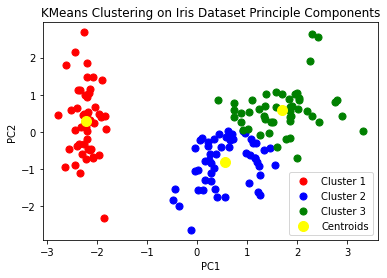

In [29]:
plt.scatter(data.iloc[y_kmeans == 0, 0], data.iloc[y_kmeans == 0, 1], s=50, c='red', label='Cluster 1')
plt.scatter(data.iloc[y_kmeans == 1, 0], data.iloc[y_kmeans == 1, 1], s=50, c='blue', label='Cluster 2')
plt.scatter(data.iloc[y_kmeans == 2, 0], data.iloc[y_kmeans == 2, 1], s=50, c='green', label='Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='yellow', label='Centroids')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.title('KMeans Clustering on Iris Dataset Principle Components')
plt.show()

This figure actually looks much better than before. Because of the limitation of the K-mean method, these dots are supposed to be circular around the centre. If using [Mahalanobis distance](https://en.wikipedia.org/wiki/Mahalanobis_distance), the identification can be improved. ADA does not require this.